In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup as BS

In [ ]:
pip install webdriver_manager

In [2]:
# 셀레니움 사용
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.support.ui import Select
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.options import Options


In [3]:
url = "https://tmacs.kotsa.or.kr/web/TG/TG200/TG2100S/Tgsearch01_AJAX.jsp"
main_url = "https://tmacs.kotsa.or.kr/web/TG/TG200/TG2100S/Tg2102.jsp?mid=S1202#" #  

In [4]:
# 지자체 크롤링
# r = requests.get(main_url)
# bs = BS(r.text)
# bs

In [5]:
# # <div class="form_wrap">
# # <select id="jijace">
# bs.findAll('div', id="jijace")

selenium 실패
직접 제작

In [7]:
# r = requests.post(url, data=payload)
# bs = eval(r.text)
# df = pd.DataFrame(bs)
# pd.set_option('display.max_columns', None)
# df

In [8]:
jijace_list = [11680, 11740, 11305, 11500, 11620, 11215, 11530, 11545, 11350, 11320, 11230, 11590, 11440, 11410, 11650, 11200, 11290, 11710, 11470, 11560, 11170, 11380, 11110, 11140, 11260]
len(jijace_list)

25

In [9]:
# 서울, 강남구
payload1 = {
'gubun': 'S1202',
'mid': 'S1202',
'sYear': '2022',
'eYear': '2022',
'sido': '11000',
'jijace': '11680',
'kind1': 's104',
'kind2': 's1041',
'cartype': 'carall'
}


In [ ]:
# del totaldf1, totaldf2

In [10]:
from tqdm import tqdm

# 사고유형별 지자체 데이터
# totaldf 초기화
totaldf1 = pd.DataFrame()

# 연도별
for y in tqdm(range(2018,2023)):
    payload1['sYear'] = y
    payload1['eYear'] = y
    # 지자체별
    for x in jijace_list:
        payload1['jijace'] = x
        r = requests.post(url, data=payload1)
        df = pd.DataFrame(eval(r.text))
        df['YEAR'] = y
        totaldf1 = pd.concat([totaldf1, df])

# 유형별 컬럼추가
totaldf1['BASE_CATEGORY'] = "사고유형"

100%|█████████████████████████████████████████████████████████████████| 5/5 [02:10<00:00, 26.02s/it]


In [11]:
# 인덱스 초기화
totaldf1 = totaldf1.reset_index(drop=True)
totaldf1

,JIJACE_NM,CHISA,ACC_HUM,SIDO_CD,GUBUN_NM,SLTWD_CNT,SERI_ACC,SIDO_NM,AC_MODE,CRT_JIJACE_CD,...,TRK_CNT,DEATH_CNT,BASE_CODE,WND_CNT,DEATH_ACC,GUBUN,SERI_CNT,SLTWD_ACC,YEAR,BASE_CATEGORY
0,강남구,1.83,172,11000,승용,81,78,서울,A,11680,...,0,3,110,8,3,01,80,75,2018,사고유형
1,강남구,0.00,7,11000,승합,2,4,서울,A,11680,...,0,0,110,1,0,02,4,2,2018,사고유형
2,강남구,8.33,14,11000,화물,7,5,서울,A,11680,...,3,1,110,0,1,03,6,6,2018,사고유형
3,강남구,0.00,1,11000,특수,0,1,서울,A,11680,...,0,0,110,0,0,04,1,0,2018,사고유형
4,강남구,0.00,22,11000,이륜,9,11,서울,A,11680,...,0,0,110,2,0,05,11,5,2018,사고유형
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9406,중랑구,0.00,1,11000,자전거,0,0,서울,A,11260,...,0,0,351,1,0,07,0,0,2022,사고유형
9407,중랑구,0.00,8,11000,승용,5,1,서울,A,11260,...,0,0,399,1,0,01,2,5,2022,사고유형
9408,중랑구,0.00,19,11000,승합,9,8,서울,A,11260,...,0,0,399,2,0,02,8,9,2022,사고유형
9409,중랑구,0.00,2,11000,이륜,1,0,서울,A,11260,...,0,0,399,1,0,05,0,1,2022,사고유형


In [13]:
# 서울, 지자체 전체, 자전거 상세검색
payload2 = {'gubun': 'S1202',
'mid': 'S1202',
'sYear': '2022',
'eYear': '2022',
'sido': '11000',
'jijace': '',
'kind1': 's102',
'kind2': 's1021',
'cartype': '07'}

In [14]:
# 사고유형별 자전거 지자체 데이터
# totaldf 초기화
totaldf2 = pd.DataFrame()

# 연도별
for y in tqdm(range(2018,2023)):
    payload2['sYear'] = y
    payload2['eYear'] = y
    # 지자체별
    for x in jijace_list:
        payload2['jijace'] = x
        r = requests.post(url, data=payload2)
        df = pd.DataFrame(eval(r.text))
        df['YEAR'] = y
        totaldf2 = pd.concat([totaldf2, df])

# 유형별 컬럼추가
totaldf2['BASE_CATEGORY'] = "사고유형"

100%|█████████████████████████████████████████████████████████████████| 5/5 [02:40<00:00, 32.17s/it]


In [15]:
totaldf2 = totaldf2.rename(columns={"GUBUN_NM" : "MONTH"})
totaldf2

,JIJACE_NM,CHISA,ACC_HUM,SIDO_CD,MONTH,SLTWD_CNT,SERI_ACC,SIDO_NM,AC_MODE,CRT_JIJACE_CD,...,TRK_CNT,DEATH_CNT,BASE_CODE,WND_CNT,DEATH_ACC,GUBUN,SERI_CNT,SLTWD_ACC,YEAR,BASE_CATEGORY
0,강남구,0.0,2,11000,02,1,0,서울,A,11680,...,0,0,110,1,0,02,0,1,2018,사고유형
1,강남구,0.0,2,11000,03,0,1,서울,A,11680,...,0,0,110,0,0,03,2,0,2018,사고유형
2,강남구,0.0,3,11000,09,2,0,서울,A,11680,...,0,0,110,1,0,09,0,1,2018,사고유형
3,강남구,0.0,2,11000,06,1,1,서울,A,11680,...,0,0,140,0,0,06,1,1,2018,사고유형
4,강남구,0.0,2,11000,07,1,0,서울,A,11680,...,0,0,140,1,0,07,0,1,2018,사고유형
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39,중랑구,0.0,1,11000,09,0,1,서울,A,11260,...,0,0,299,0,0,09,1,0,2022,사고유형
40,중랑구,0.0,3,11000,10,2,1,서울,A,11260,...,0,0,299,0,0,10,1,2,2022,사고유형
41,중랑구,0.0,1,11000,11,1,0,서울,A,11260,...,0,0,299,0,0,11,0,1,2022,사고유형
42,중랑구,0.0,1,11000,03,0,0,서울,A,11260,...,0,0,351,1,0,03,0,0,2022,사고유형


In [16]:
# 인덱스 초기화
totaldf2 = totaldf2.reset_index(drop=True)
totaldf2

,JIJACE_NM,CHISA,ACC_HUM,SIDO_CD,MONTH,SLTWD_CNT,SERI_ACC,SIDO_NM,AC_MODE,CRT_JIJACE_CD,...,TRK_CNT,DEATH_CNT,BASE_CODE,WND_CNT,DEATH_ACC,GUBUN,SERI_CNT,SLTWD_ACC,YEAR,BASE_CATEGORY
0,강남구,0.0,2,11000,02,1,0,서울,A,11680,...,0,0,110,1,0,02,0,1,2018,사고유형
1,강남구,0.0,2,11000,03,0,1,서울,A,11680,...,0,0,110,0,0,03,2,0,2018,사고유형
2,강남구,0.0,3,11000,09,2,0,서울,A,11680,...,0,0,110,1,0,09,0,1,2018,사고유형
3,강남구,0.0,2,11000,06,1,1,서울,A,11680,...,0,0,140,0,0,06,1,1,2018,사고유형
4,강남구,0.0,2,11000,07,1,0,서울,A,11680,...,0,0,140,1,0,07,0,1,2018,사고유형
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4440,중랑구,0.0,1,11000,09,0,1,서울,A,11260,...,0,0,299,0,0,09,1,0,2022,사고유형
4441,중랑구,0.0,3,11000,10,2,1,서울,A,11260,...,0,0,299,0,0,10,1,2,2022,사고유형
4442,중랑구,0.0,1,11000,11,1,0,서울,A,11260,...,0,0,299,0,0,11,0,1,2022,사고유형
4443,중랑구,0.0,1,11000,03,0,0,서울,A,11260,...,0,0,351,1,0,03,0,0,2022,사고유형


In [19]:
# totaldf[totaldf.JIJACE_NM.str.find('강남구') > -1]
# totaldf[totaldf.JIJACE_NM == '강남구']
# mask = kdf.연봉.str.find('달러') > -1
print(totaldf1.shape)
print(totaldf2.shape)

(9411, 25)
(4445, 25)


In [20]:
# 전체 조사군 수
totaldf2.ACC_CNT.sum()

8492

In [ ]:
import pickle
# binary save , load
with open("./acci_type.pkl", "wb") as f:
    pickle.dump(totaldf, f)

In [ ]:
import pickle
# binary save , load
with open("./accitype_accident_cycle_month.pkl", "wb") as f:
    pickle.dump(totaldf, f)

In [ ]:
# db 만들기
for x in totaldf.columns:
    print(f"`{x}`,")

In [ ]:
totaldf['JIJACE_NM'].unique()

# 데이터베이스에 테이블 생성및 데이터 삽입

In [ ]:
# 연습
import pymysql
import pandas as pd
con =pymysql.connect(host='', user='', password='', db='', charset='utf8')
cur = con.cursor()

In [21]:
# DB연결
import pymysql
import pandas as pd
con = pymysql.connect(host='', user='', password='', db='', charset='utf8')
cur = con.cursor()

In [22]:
sql= """CREATE Table accitype_accident
(
    JIJACE_NM VARCHAR(30),
    CHISA FLOAT,
    ACC_HUM INT,
    SIDO_CD INT,
    GUBUN_NM VARCHAR(30),
    SLTWD_CNT INT,
    SERI_ACC INT,
    SIDO_NM VARCHAR(10),
    AC_MODE VARCHAR(4),
    CRT_JIJACE_CD INT ,
    BASE_NAME VARCHAR(30),
    BIG_CNT INT,
    PSGT_CNT INT,
    WND_ACC INT,
    ACC_CNT INT,
    TRK_CNT INT,
    DEATH_CNT INT,
    BASE_CODE VARCHAR(10),
    WND_CNT INT,
    DEATH_ACC INT,
    GUBUN VARCHAR(5),
    SERI_CNT INT,
    SLTWD_ACC INT,
    YEAR INT,
    BASE_CATEGORY VARCHAR(10)
)"""


In [23]:
sql= """CREATE Table accitype_accident_cycle_month
(
    JIJACE_NM VARCHAR(30),
    CHISA FLOAT,
    ACC_HUM INT,
    SIDO_CD INT,
    MONTH VARCHAR(30),
    SLTWD_CNT INT,
    SERI_ACC INT,
    SIDO_NM VARCHAR(10),
    AC_MODE VARCHAR(4),
    CRT_JIJACE_CD INT ,
    BASE_NAME VARCHAR(30),
    BIG_CNT INT,
    PSGT_CNT INT,
    WND_ACC INT,
    ACC_CNT INT,
    TRK_CNT INT,
    DEATH_CNT INT,
    BASE_CODE VARCHAR(10),
    WND_CNT INT,
    DEATH_ACC INT,
    GUBUN VARCHAR(5),
    SERI_CNT INT,
    SLTWD_ACC INT,
    YEAR INT,
    BASE_CATEGORY VARCHAR(10)
)"""


In [ ]:
cur.execute(sql)

In [ ]:
con.commit()

In [ ]:
insert_query = """INSERT INTO road_accident VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)"""

In [25]:
def tmp1(x):
    insert_query = """INSERT INTO accitype_accident VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s);"""
    cur.execute(insert_query, x.tolist())
    return 0

In [26]:
def tmp2(x):
    insert_query = """INSERT INTO accitype_accident_cycle_month VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s);"""
    cur.execute(insert_query, x.tolist())
    return 0

In [ ]:
totaldf.shape

In [ ]:
# 데이터 인서트
# totaldf.apply(tmp1, axis=1)

In [ ]:
con.commit()

In [ ]:
# 데이터 인서트
# totaldf.apply(tmp2, axis=1)

In [ ]:
con.commit()

In [ ]:
# 히트맵
import folium
import json
map = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles="cartodb positron")
# url = 위도경도 링크
geo_str = requests.get("https://t1.daumcdn.net/cfile/tistory/272C224C58B4BD540B").json()
data = totaldf.groupby(['JIJACE_NM'],as_index=False)[['ACC_HUM']].sum()
m = folium.Choropleth(geo_str, 
                  data = data,
                  columns=['JIJACE_NM', 'ACC_HUM'],
                  fill_color="PuRd",
                  key_on="feature.id").add_to(map)

In [ ]:
map

In [ ]:
totaldf.head(1)

In [ ]:
totaldf['GUBUN_NM'].unique()

# 따릉이 데이터

In [27]:
# 따릉이 데이터
import glob
import pandas as pd
from tqdm import tqdm


# 2020
total_pb2020 = pd.DataFrame()
for x in tqdm(glob.glob("./data/2020/*.csv")):
    try:
        tmp = pd.read_csv(x, encoding='cp949')
    except:
        tmp = pd.read_csv(x)
    total_pb2020 = pd.concat([total_pb2020, tmp])

print("all done")

100%|███████████████████████████████████████████████████████████████| 12/12 [00:02<00:00,  5.89it/s]

all done


In [28]:
# 2021
total_pb2021 = pd.DataFrame()
for x in tqdm(glob.glob("./data/2021/*.csv")):
    tmp = pd.read_csv(x, encoding='cp949')
    total_pb2021 = pd.concat([total_pb2021, tmp])


# 2022
total_pb2022 = pd.DataFrame()
for x in tqdm(glob.glob("./data/2022/*.csv")):
    tmp = pd.read_csv(x, encoding='cp949')
    total_pb2022 = pd.concat([total_pb2022, tmp])


print("all done")

100%|█████████████████████████████████████████████████████████████████| 7/7 [00:04<00:00,  1.61it/s]

all done


In [29]:
print(total_pb2021.shape)
print(total_pb2022.shape)

(1323515, 13)
(1383448, 11)


In [ ]:
pip install openpyxl

In [65]:

# 2019
total_pb2019 = pd.DataFrame()
for x in tqdm(glob.glob("./data/2019/*")):
    try:
        try:
            tmp = pd.read_csv(x, encoding='cp949')
        except:
            tmp = pd.read_csv(x)
        total_pb2019 = pd.concat([total_pb2019, tmp])
    except:
        tmp = pd.read_excel(x, engine='openpyxl')
        total_pb2019 = pd.concat([total_pb2019, tmp])


# 2018
total_pb2018 = pd.DataFrame()
for x in tqdm(glob.glob("./data/2018/*")):
    try:
        try:
            tmp = pd.read_csv(x, encoding='cp949')
        except:
            tmp = pd.read_csv(x)
        tmp = tmp.columns.str.replace("'", "")
        total_pb2018 = pd.concat([total_pb2018, tmp])
    except:
        tmp = pd.read_excel(x, engine='openpyxl')
        tmp = tmp.columns.str.replace("'", "")
        total_pb2018 = pd.concat([total_pb2018, tmp])

# df = pd.read_excel(filename, engine='openpyxl')

    

print("all done")


  0%|                                                                        | 0/12 [00:00<?, ?it/s]


BadZipFile: File is not a zip file

In [ ]:
# total_df["대여소번호"] = total_df["대여소번호"].apply(lambda x :  (str(x).replace("'","")))
tmp = pd.read_csv(x)
tmp.columns = tmp.columns.str.replace("'", "")
tmp

In [ ]:
print(total_pb2019.shape)
print(total_pb2018.shape)

In [ ]:
total_pb2018 = total_pb2018.set_index('대여일자').sort_index(axis=0).reset_index()
total_pb2019 = total_pb2019.set_index('대여일자').sort_index(axis=0).reset_index()
total_pb2020 = total_pb2020.set_index('대여일자').sort_index(axis=0).reset_index()
total_pb2021 = total_pb2021.set_index('대여일자').sort_index(axis=0).reset_index()
total_pb2022 = total_pb2022.set_index('대여일자').sort_index(axis=0).reset_index()

In [ ]:
tmp = total_pb2018.columns.str.replace("'", "")
tmp

In [ ]:
total_pb2020.text.head()

# 그래프그리기

In [ ]:
pip install matplotlib

In [ ]:
pip install seaborn

In [32]:
import seaborn as sns

plt.figure(figsize=(30,6))
sns.barplot(x=totaldf2['MONTH'], y=totaldf2['ACC_CNT'], color='steelblue')
plt.title('Number of Bicycle Accident by Month')
plt.xlabel('MONTH')
plt.ylabel('Number of Accident')
plt.show()

NameError: name 'plt' is not defined

In [ ]:
# 연습코드

# import matplotlib.pyplot as plt
# import random
 
# # 2 * 2 개의 그래프, 5 * 5인치 크기 화면 
# fig, ax = plt.subplots(2, 2, figsize = (5, 5))
 
# ax[0, 0].plot(range(10), 'r') #row 0, col 0 (0행 0열)
# ax[1, 0].plot(range(10), 'b') #row 1, col 0
# ax[0, 1].plot(range(10), 'g') #row 0, col 1
# ax[1, 1].plot(range(10), 'k') #row 1, col 1
# plt.show()

In [31]:
# 월별 자전거 이용자수
monthly_bikeuse = pd.read_sql_query("select Rent_Date, sum(Rent_Count) as monthly_cnt \
from CycleRentUse \
group by Rent_Date;", con=con)


/tmp/ipykernel_464/2751998658.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  monthly_bikeuse = pd.read_sql_query("select Rent_Date, sum(Rent_Count) as monthly_cnt \


In [33]:
monthly_bikeuse = monthly_bikeuse.set_index("Rent_Date").sort_index().reset_index()
monthly_bikeuse

,Rent_Date,monthly_cnt
0,2018-01,164320.0
1,2018-02,168687.0
2,2018-03,462584.0
3,2018-04,668474.0
4,2018-05,929061.0
5,2018-06,1207034.0
6,2018-07,1100015.0
7,2018-08,1037505.0
8,2018-09,1447993.0
9,2018-10,1420621.0


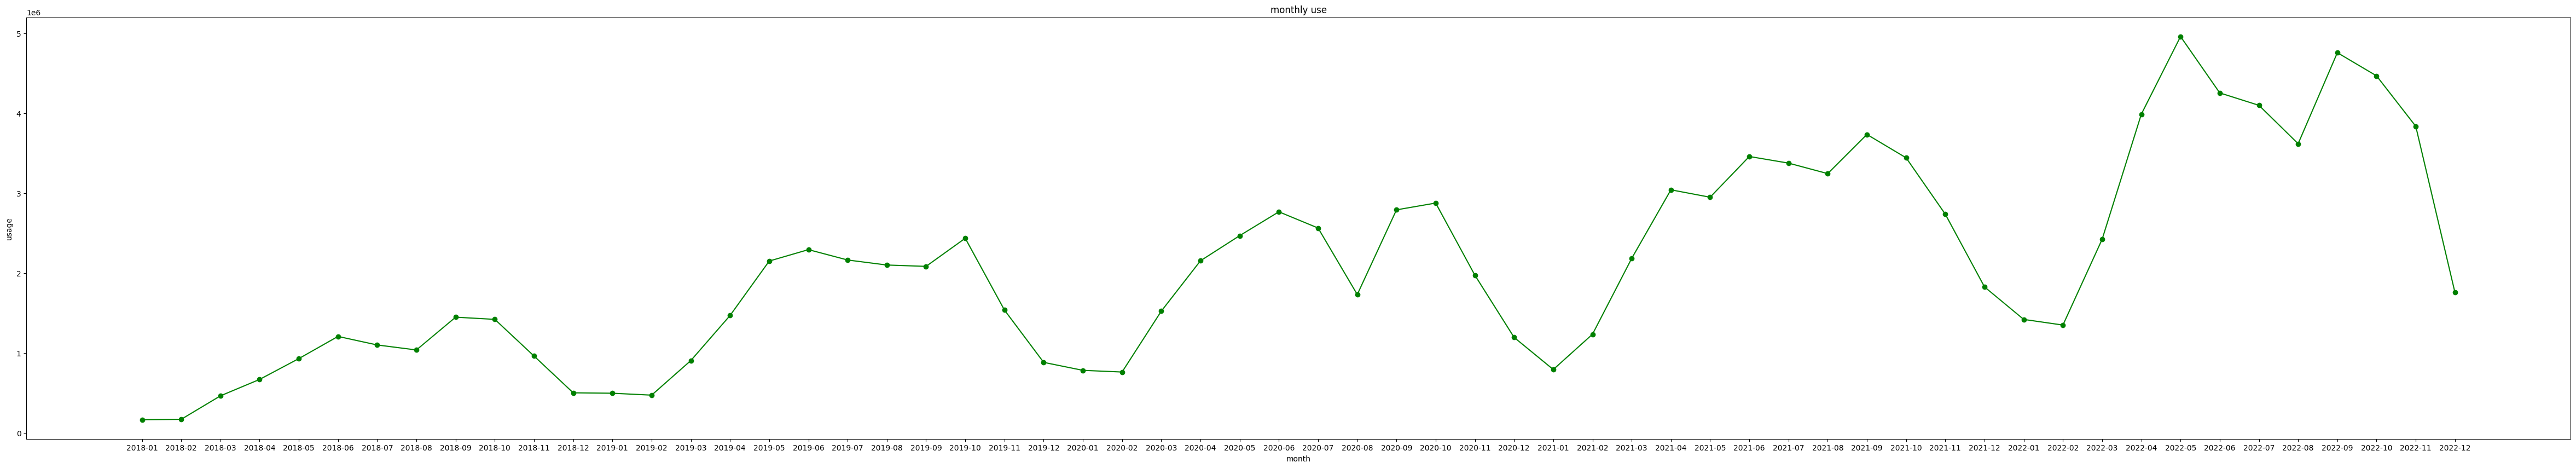

In [34]:
# 월별 자전거 이용량 그래프
import matplotlib.pyplot as plt    #맷플롯립의 pyplot 모듈

# 그래프 사이즈 (가로, 세로)
plt.figure(figsize=(60,10))

month = monthly_bikeuse['Rent_Date']
usage = monthly_bikeuse['monthly_cnt']
 
#선 그래프를 그린다. x축에는 month, y축에는 usage 표시한다.
plt.plot(month, usage, color = 'green', marker = 'o', linestyle = 'solid')
 
#제목을 설정한다.
plt.title('monthly use') 
 
#y축에 레이블을 붙인다.
plt.ylabel('usage')
plt.xlabel('month')
# plt.savefig('gdp_per_capita.png', dpi = 600)
plt.show()

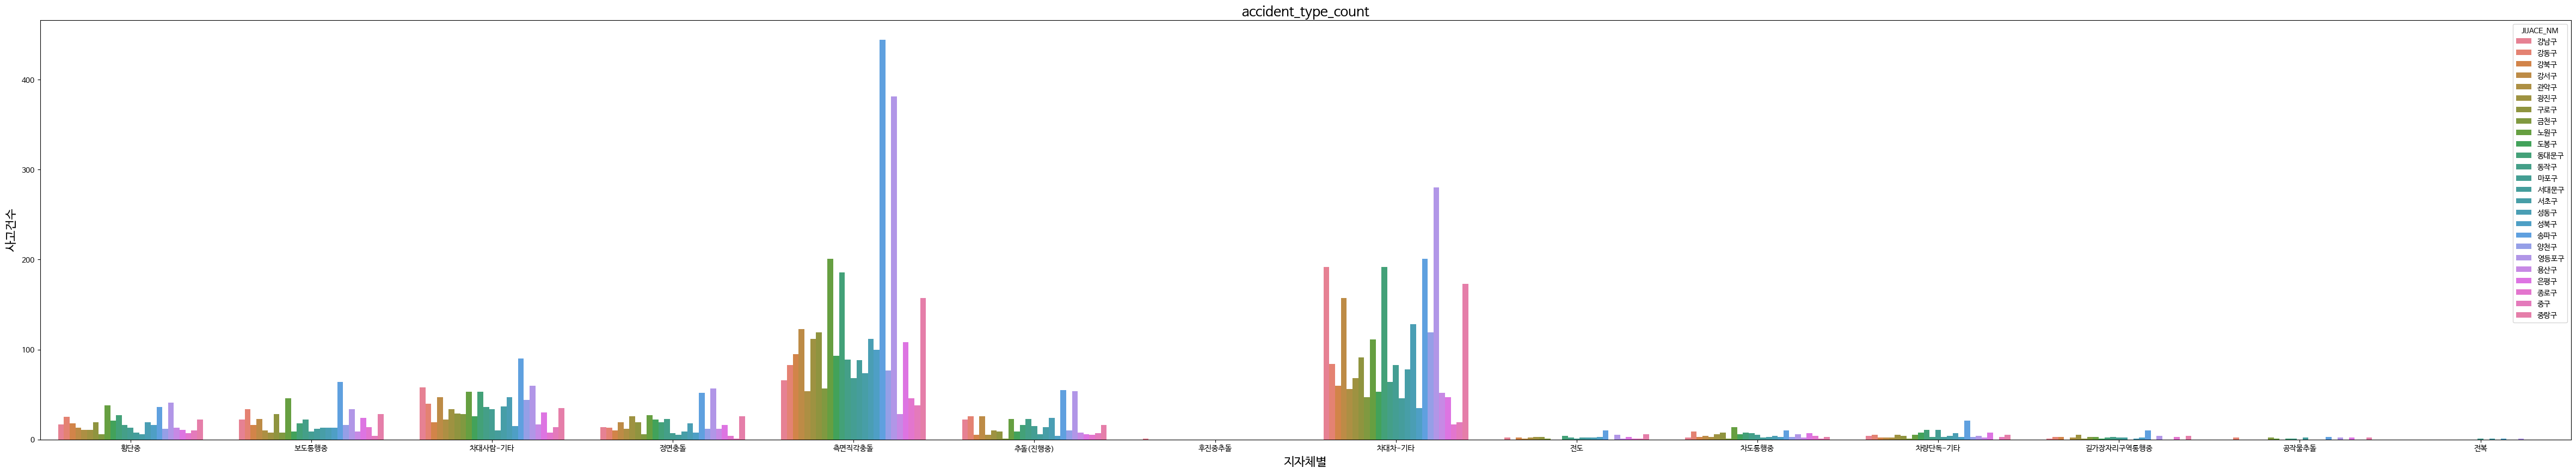

In [66]:
# 지자체별 사고유형별 자전거 누적 사고건수 그래프

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import font_manager, rc
import seaborn as sns

#중요! 한글폰트가 사용된  plt.show() 함수 앞에 위치 시켜야 함

font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothicLight.ttf'
font_name = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family=font_name)



ji_acc_bike = pd.read_sql_query("select JIJACE_NM, BASE_NAME, sum(ACC_CNT) as ACC_CNT \
from accitype_accident_cycle_month \
group by JIJACE_NM, BASE_NAME;", con=con)



plt.figure(figsize =(60,10))

jijace_type = sns.barplot(x="BASE_NAME", y="ACC_CNT", hue="JIJACE_NM", data=ji_acc)
jijace_type.set_title('accident_type_count', fontsize=18)
jijace_type.set_xlabel('지자체별', fontdict={'size':16})
jijace_type.set_ylabel('사고건수', fontdict={'size':16})

plt.show()


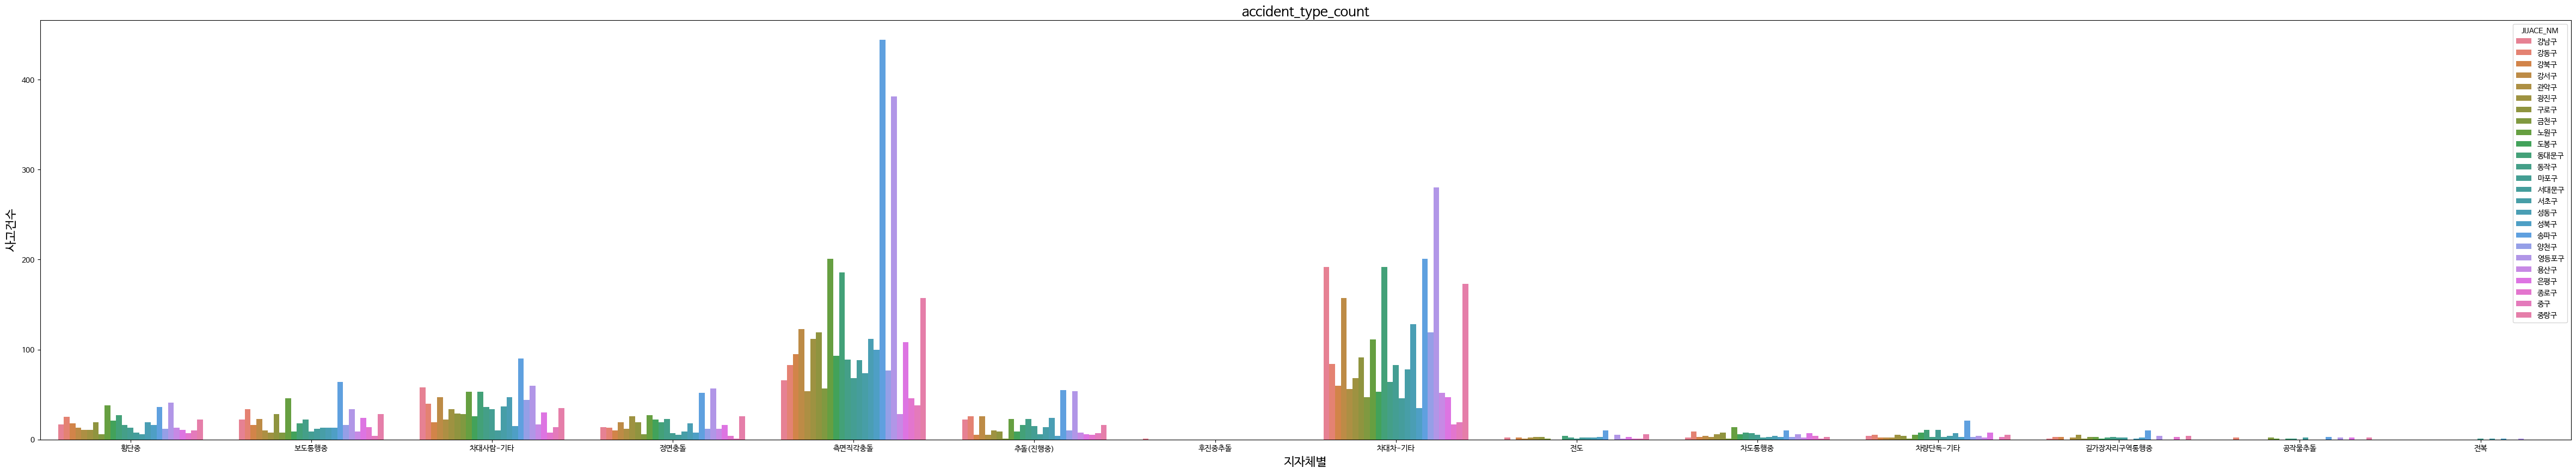

In [67]:
# 지자체별 사고유형별 누적 사고건수 그래프

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import font_manager, rc
import seaborn as sns

ji_acc = pd.read_sql_query("select JIJACE_NM, BASE_NAME, sum(ACC_CNT) as ACC_CNT \
from accitype_accident \
group by JIJACE_NM, BASE_NAME;", con=con)


acc_gangnam = ji_acc[ji_acc.JIJACE_NM == '강남구']


# print(acc_gangnam.info())


#중요! 한글폰트가 사용된  plt.show() 함수 앞에 위치 시켜야 함

font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothicLight.ttf'
font_name = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family=font_name)



ji_acc = pd.read_sql_query("select JIJACE_NM, BASE_NAME, sum(ACC_CNT) as ACC_CNT \
from accitype_accident \
group by JIJACE_NM, BASE_NAME;", con=con)





plt.figure(figsize =(60,10))

jijace_type = sns.barplot(x="BASE_NAME", y="ACC_CNT", hue="JIJACE_NM", data=ji_acc)
jijace_type.set_title('accident_type_count', fontsize=18)
jijace_type.set_xlabel('지자체별', fontdict={'size':16})
jijace_type.set_ylabel('사고건수', fontdict={'size':16})

plt.show()


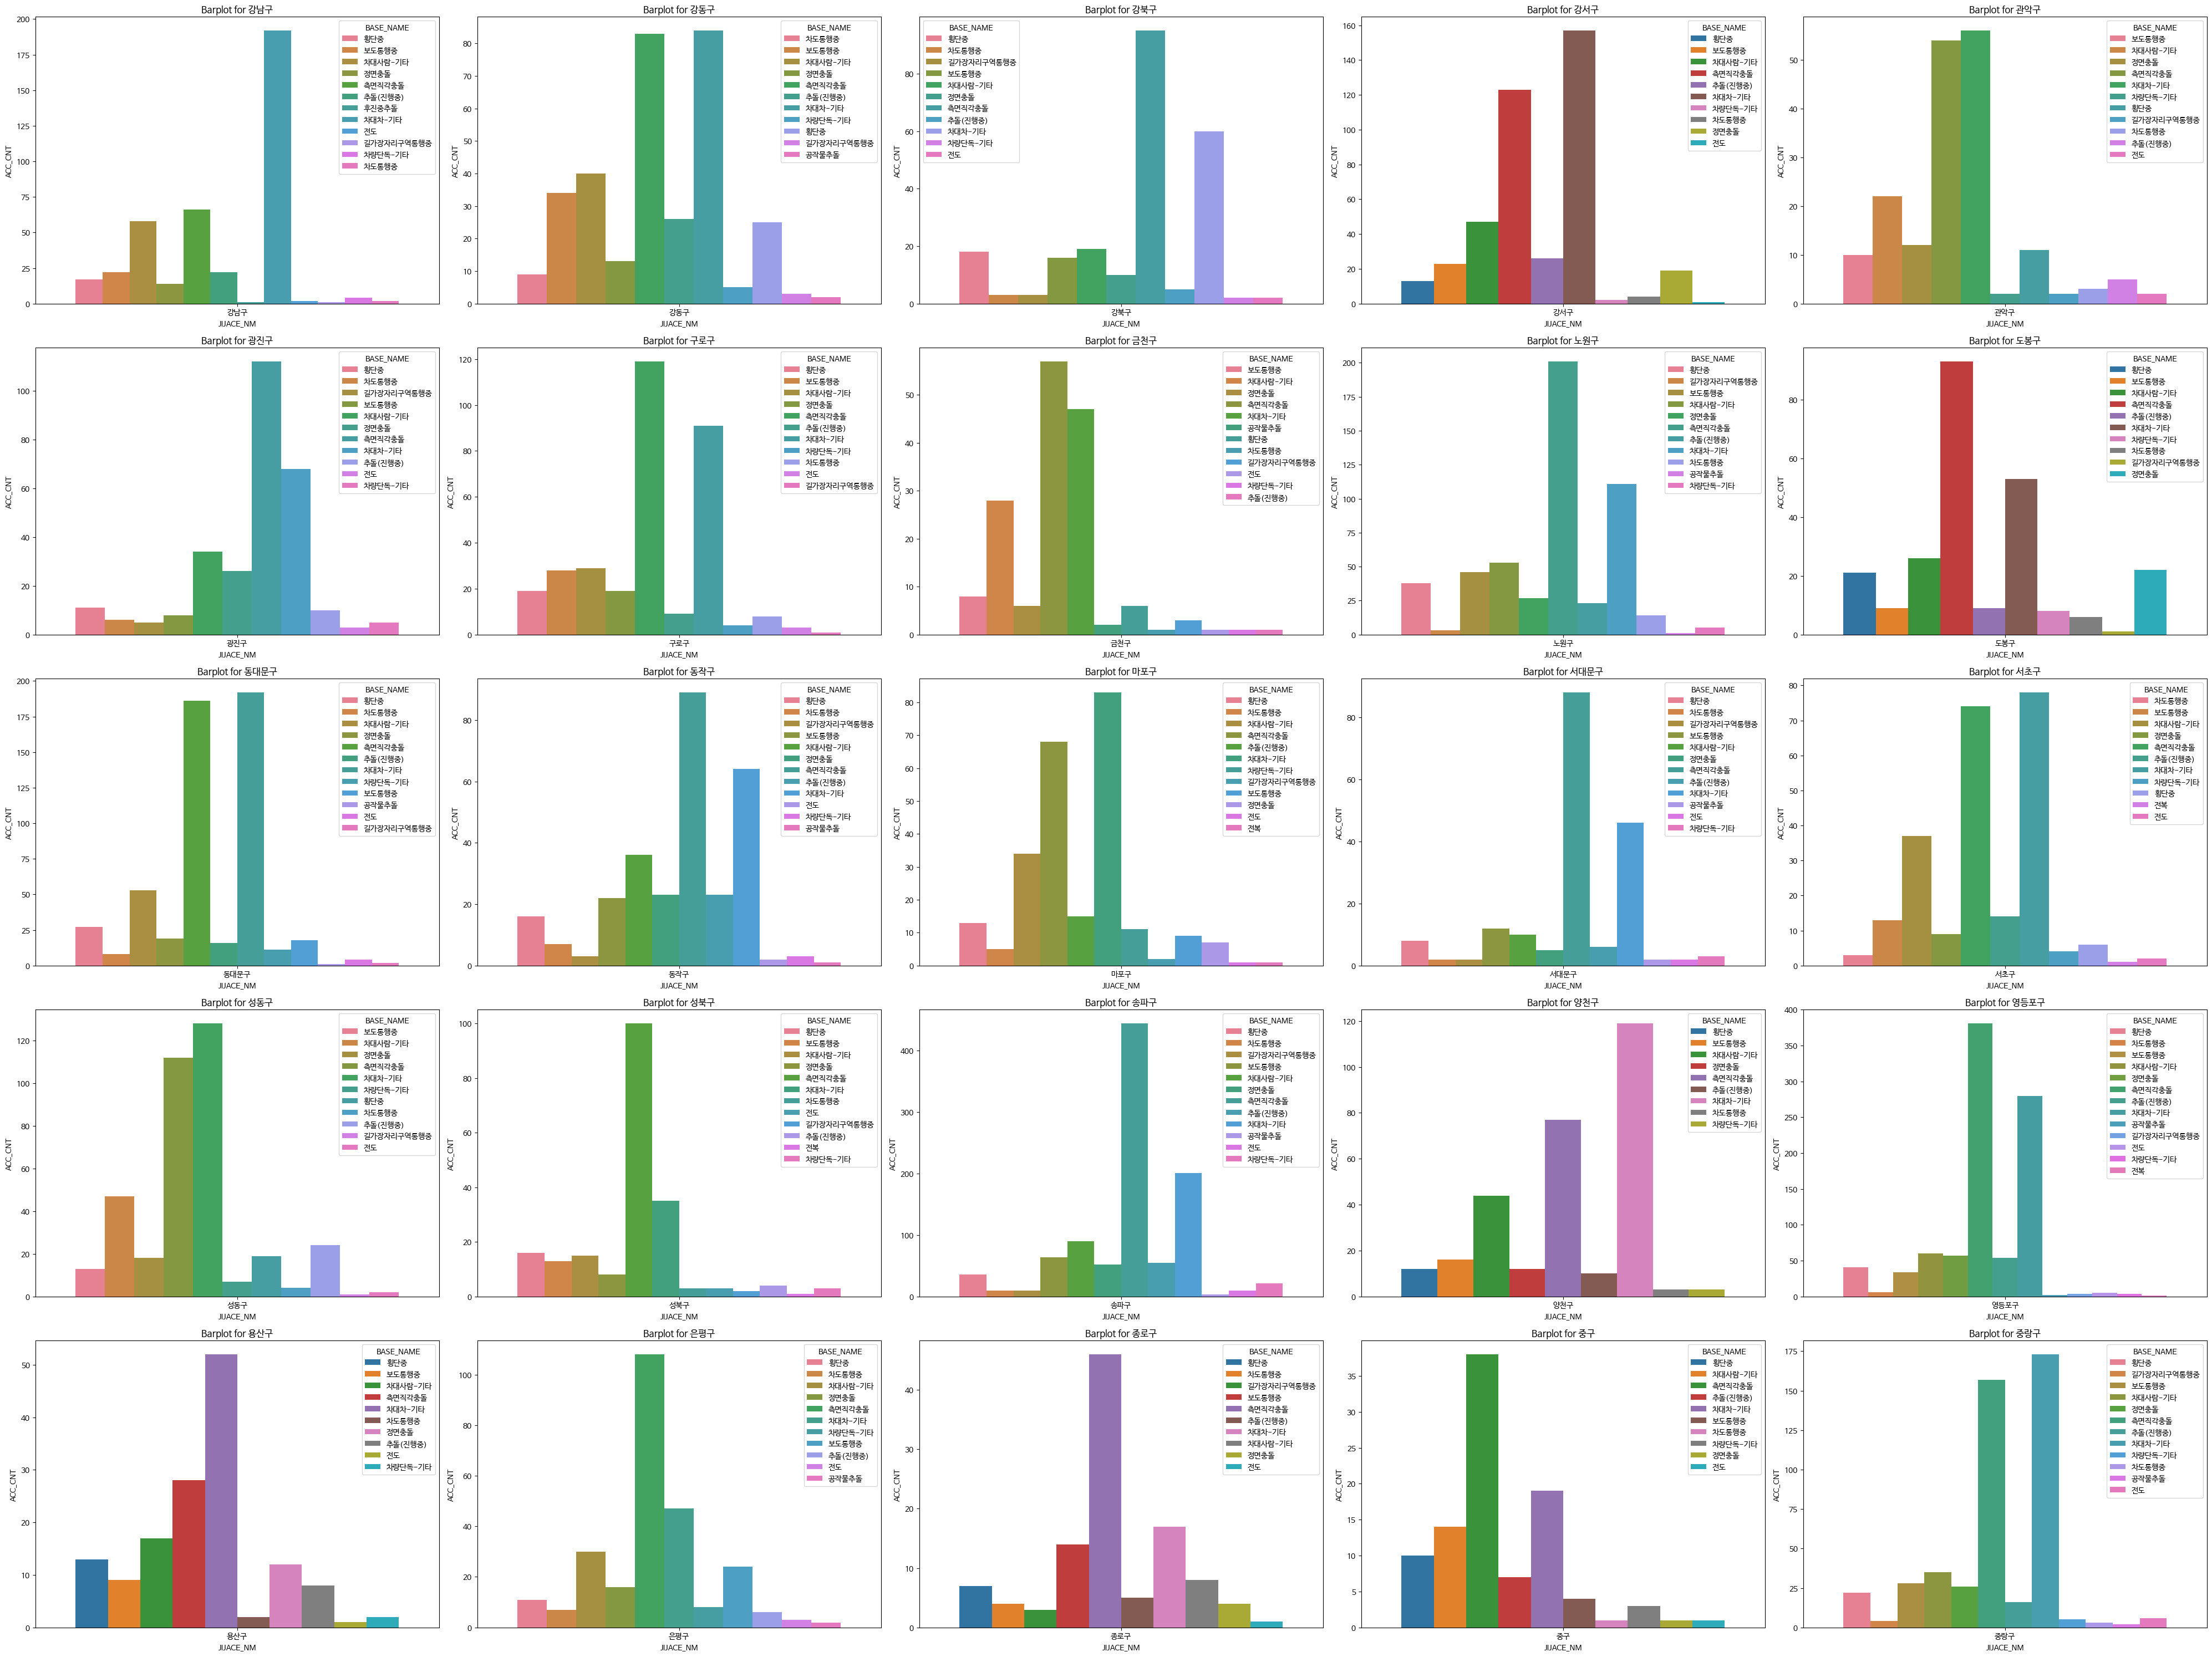

In [57]:
fig, axes = plt.subplots(5, 5, figsize=(40,30))
y_ranges = []
for i, gugun in enumerate(ji_acc['JIJACE_NM'].unique()):
  row = i // 5
  col = i % 5

  all_df = ji_acc[ji_acc['JIJACE_NM'] == gugun]
  sns.barplot(x=all_df['JIJACE_NM'], y=all_df['ACC_CNT'], hue=all_df['BASE_NAME'], data=all_df, errorbar=None, ax=axes[row, col])
  axes[row, col].set_title(f'Barplot for {gugun}')

plt.tight_layout()
plt.show()

In [41]:

ji_acc = pd.read_sql_query("select JIJACE_NM, BASE_NAME, sum(ACC_CNT) as ACC_CNT \
from accitype_accident \
group by JIJACE_NM, BASE_NAME;", con=con)
acc_gangnam = ji_acc[ji_acc.JIJACE_NM == '강남구']


/tmp/ipykernel_464/2943809100.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  ji_acc = pd.read_sql_query("select JIJACE_NM, BASE_NAME, sum(ACC_CNT) as ACC_CNT \


In [42]:
acc_gangnam

,JIJACE_NM,BASE_NAME,ACC_CNT
0,강남구,횡단중,17.0
1,강남구,보도통행중,22.0
2,강남구,차대사람-기타,58.0
3,강남구,정면충돌,14.0
4,강남구,측면직각충돌,66.0
5,강남구,추돌(진행중),22.0
6,강남구,후진중추돌,1.0
7,강남구,차대차-기타,192.0
8,강남구,전도,2.0
193,강남구,길가장자리구역통행중,1.0


In [ ]:
acc_type = acc_gangnam['BASE_NAME']
acc_cnt = acc_gangnam['ACC_CNT']


